# IntroStat Week 2 

Welcome to the second lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 2.


In [96]:
import numpy as np
import matplotlib.pyplot as plt

## Continued from week 1: 

In [97]:
import numpy as np
import matplotlib.pyplot as plt
# Data resembling student heights of 10 students:
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
x.sort()
print(x)

[161 166 167 168 179 179 184 187 191 198]


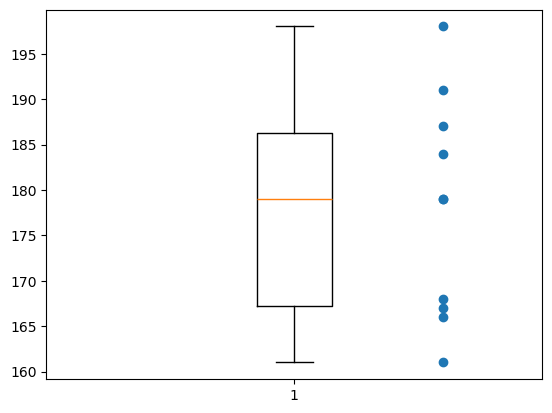

In [98]:
# make a boxplot (median, quartiles + whiskers)
plt.boxplot(x)
# also plot actual data values:
plt.scatter([1.3]*10, x)
# show plot:
plt.show()

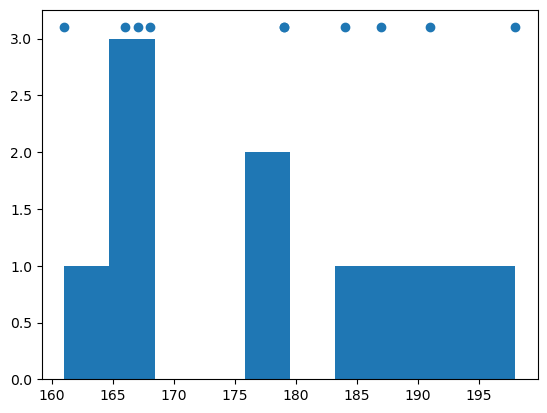

In [99]:
# Create a histogram
plt.hist(x)
plt.scatter(x, [3.1]*10)
plt.show()

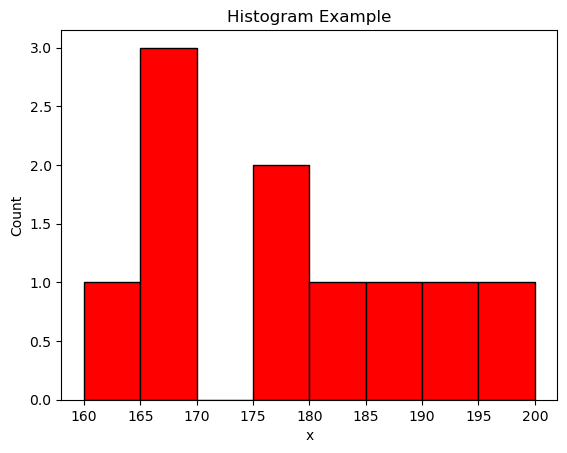

[161 166 167 168 179 179 184 187 191 198]


In [100]:
# Customize the histogram:
plt.hist(x, bins=np.arange(160,205,5), edgecolor='black', color='red')
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histogram Example')
plt.show()
print(x)

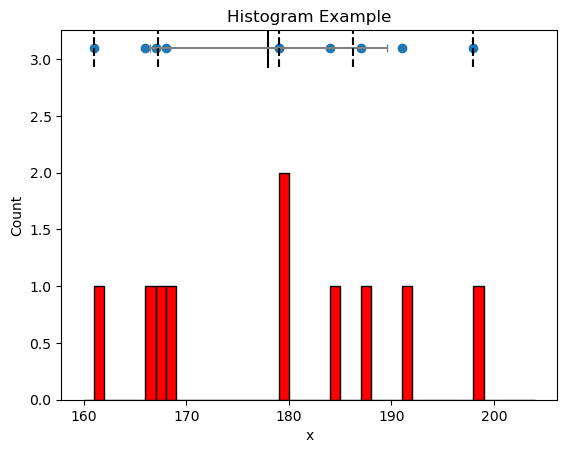

[161 166 167 168 179 179 184 187 191 198]


In [101]:
# Customize the histogram:
plt.hist(x, bins=np.arange(160,205,1), edgecolor='black', color='red')
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histogram Example')
plt.axvline(np.mean(x), linestyle='-', color='black', ymin=.9, ymax=1)
plt.plot([np.mean(x)-np.std(x), np.mean(x)+np.std(x)], [3.1, 3.1], '|', linestyle="-", color='grey')
plt.axvline(np.median(x), linestyle='--', ymin=.9, ymax=1, color='black')
plt.axvline(np.percentile(x, 0), linestyle='--', ymin=.9, ymax=1, color='black')
plt.axvline(np.percentile(x, 25), linestyle='--', ymin=.9, ymax=1, color='black')
plt.axvline(np.percentile(x, 75), linestyle='--', ymin=.9, ymax=1, color='black')
plt.axvline(np.percentile(x, 100), linestyle='--', ymin=.9, ymax=1, color='black')
plt.scatter(x, [3.1]*10)
plt.show()
print(x)

# høje værdier på histogramet er mange data

Histograms are important - they show how the data is **distributed** <br>

Histograms are **dependent on the choice of binwidth** - try changing to binwidth=1

#### "Cumulative distribution"

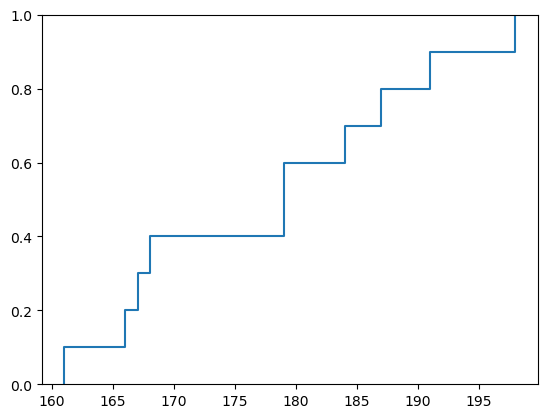

[161 166 167 168 179 179 184 187 191 198]


In [102]:
# plot the "empirical cumulated density function"
plt.ecdf(x)
plt.show()
print(x)

# hver gang der er et data punkt er det et step opad
# stiger meget så er der mange data

### Working with data - dataframes and Pandas

In [103]:
# import the Pandas library
import pandas as pd 

In [104]:
# Make a DataFrame:
data = pd.DataFrame({
    'males':  [152, 171, 173, 173, 178, 179, 180, 180, 182, 182, 182, 185, 
                    185 ,185, 185, 185 ,186 ,187 ,190 ,190, 192, 192, 197], 
    'females':[159, 166, 168 ,168 ,171 ,171 ,172, 172, 173, 174 ,175 ,175,
                    175, 175, 175, 177, 178, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
})
print(data.head())

   males  females
0    152    159.0
1    171    166.0
2    173    168.0
3    173    168.0
4    178    171.0


The dataframe has ***named columns*** (and indexed rows - rows can also have names)

In [105]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


array([[<Axes: title={'center': 'males'}>,
        <Axes: title={'center': 'females'}>]], dtype=object)

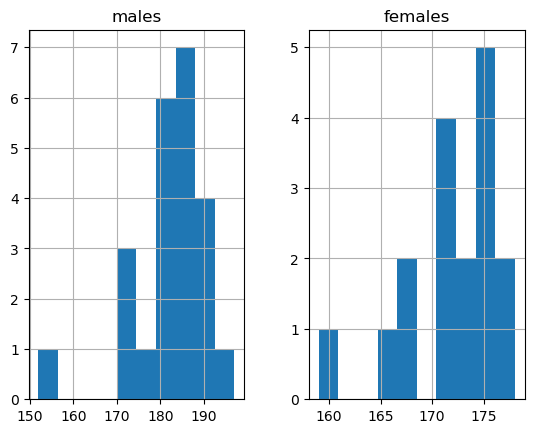

In [106]:
# The DataFrame has a direct method for making a histogram:
data.hist()

#### **Reading data from an external file**

It is very important to learn how to read data from other files. In practice one will never type all the data into Python by hand!

In [107]:
csv_data= pd.read_csv("studentheights.csv", sep=';')

In [108]:
print(type(csv_data))

<class 'pandas.core.frame.DataFrame'>


In [109]:
csv_data.head()

,Height,Gender
0,152,male
1,171,male
2,173,male
3,173,male
4,178,male


Notice that this DataFrame is differently structured compared to the one from above (which had columns: "males" and "females").

If we want to do a histogram for each gender, we need to include the "by=.." argument:

array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

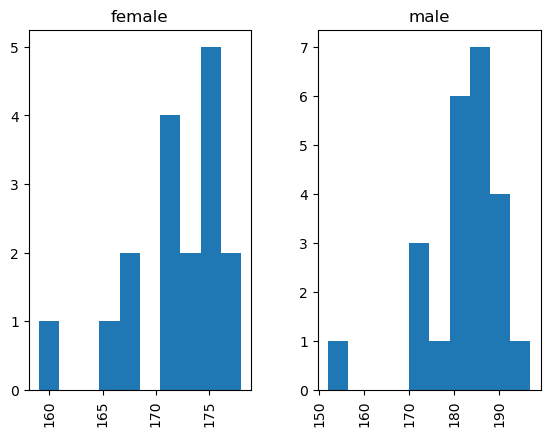

In [110]:
csv_data.hist(by='Gender')

### Week 2:

### Example 1: Simmulation of a stochastic variable (rolling a dice)

In [111]:
result = np.random.choice(range(1,7), size=1) # size 1 betyder kun ét tilfældigt tak
print(result)

[6]


### Example 2: Simulate n rolls with a fair dice

In [112]:
# Number of simulated realizations (sample size)
n = 30

# roll dice:
xFair = np.random.choice([1,2,3,4,5,6], size=n, replace=True) #resultater melle 1 og 6
print(xFair)

[2 6 3 3 4 5 5 5 6 5 1 6 5 4 2 4 5 5 3 2 2 5 2 3 4 5 1 3 3 2]


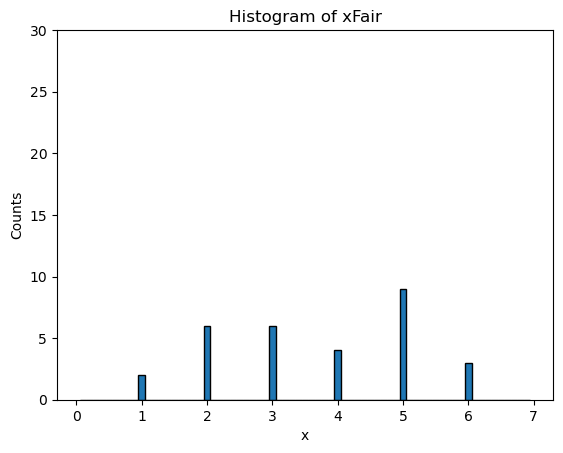

In [113]:
# Plot histogram:
plt.hist(xFair, bins=np.arange(0.05,7,.1),edgecolor='black')
plt.xlabel('x')
plt.ylabel('Counts')
plt.ylim([0,n])
plt.title('Histogram of xFair')
plt.show()

In [114]:
# Count the number of each outcome using the bincount function
counts = np.bincount(xFair) #tæller hvor mange 0 der er, hvor mange 1 der er osv. 
print(counts)

[0 2 6 6 4 9 3]


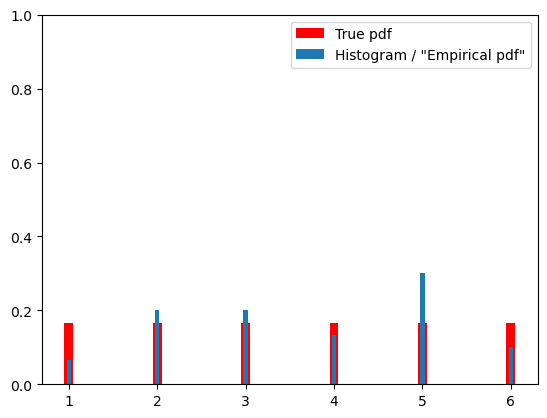

In [115]:
# Plot the true/theoretical pdf 
plt.bar(range(1,7), [1/6]*6, color='red', label='True pdf', width=0.1)

# add the empirical pdf (normalised histogram) to the plot
plt.bar(range(1,7), counts[1:7]/n, width=0.05, label='Histogram / "Empirical pdf"')

# add legend to the plot
plt.legend()

# set limits of y-axis 
plt.ylim([0,1])

# show the plot
plt.show()

### Example 3: Simmulate n rolls with an unfair dice

In [116]:
# Number of simulated realizations (sample size)
n = 300

# roll dice:
probs = [1/7, 1/7, 1/7, 1/7, 1/7, 2/7] #sansynligheder
xUnFair = np.random.choice([1,2,3,4,5,6], size=n, replace=True, p=probs)
print(xUnFair)

[6 6 6 4 1 3 5 6 1 4 2 3 3 1 2 6 4 2 1 5 6 1 6 4 3 3 4 4 2 2 6 6 5 4 4 5 5
 6 6 5 4 2 6 6 2 4 2 4 2 6 3 3 6 2 2 4 3 5 4 3 4 4 6 6 4 3 4 1 3 4 1 6 2 2
 2 3 5 1 3 4 2 6 6 1 6 1 6 3 4 6 2 5 6 1 3 5 6 5 3 1 4 5 6 6 1 6 1 1 6 6 3
 1 6 3 6 1 6 1 3 5 3 1 2 5 6 1 5 6 6 3 5 6 4 1 3 6 4 1 5 5 1 6 6 5 3 2 3 2
 1 6 1 2 3 4 3 5 6 2 6 2 5 3 3 5 6 2 4 6 3 2 6 6 3 3 4 6 1 3 5 2 4 4 4 5 2
 6 5 1 2 1 5 3 3 6 6 1 3 4 5 6 6 2 3 3 6 1 2 5 6 5 6 6 4 6 1 1 4 2 6 1 2 6
 3 6 4 5 2 3 6 3 3 4 3 6 4 5 6 2 3 4 6 1 4 4 6 1 4 4 6 2 5 2 1 6 3 6 5 6 4
 5 2 5 5 1 2 4 1 4 2 6 3 1 3 6 4 6 4 3 5 6 6 3 2 2 2 1 3 2 6 6 1 6 3 5 4 1
 4 3 5 1]


In [117]:
# Count the number of each outcome using the bincount function
counts = np.bincount(xUnFair)
print(counts)

[ 0 43 42 51 47 39 78]


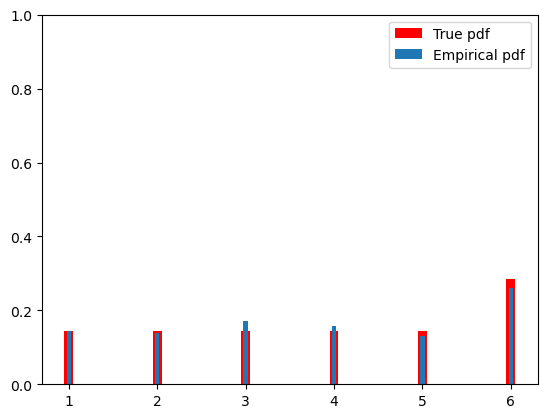

In [118]:
# Plot the true/theoretical pdf 
plt.bar(range(1,7), probs, color='red', label='True pdf', width=0.1)

# add the empirical pdf to the plot
plt.bar(range(1,7), counts[1:7]/n, width=0.05, label='Empirical pdf')


plt.legend()
plt.ylim([0,1])
plt.show()

# de blå er vores data

### Example 4: ECDF

In [119]:
# Take the data from the unfair dice again
print(xUnFair)
print(counts)

[6 6 6 4 1 3 5 6 1 4 2 3 3 1 2 6 4 2 1 5 6 1 6 4 3 3 4 4 2 2 6 6 5 4 4 5 5
 6 6 5 4 2 6 6 2 4 2 4 2 6 3 3 6 2 2 4 3 5 4 3 4 4 6 6 4 3 4 1 3 4 1 6 2 2
 2 3 5 1 3 4 2 6 6 1 6 1 6 3 4 6 2 5 6 1 3 5 6 5 3 1 4 5 6 6 1 6 1 1 6 6 3
 1 6 3 6 1 6 1 3 5 3 1 2 5 6 1 5 6 6 3 5 6 4 1 3 6 4 1 5 5 1 6 6 5 3 2 3 2
 1 6 1 2 3 4 3 5 6 2 6 2 5 3 3 5 6 2 4 6 3 2 6 6 3 3 4 6 1 3 5 2 4 4 4 5 2
 6 5 1 2 1 5 3 3 6 6 1 3 4 5 6 6 2 3 3 6 1 2 5 6 5 6 6 4 6 1 1 4 2 6 1 2 6
 3 6 4 5 2 3 6 3 3 4 3 6 4 5 6 2 3 4 6 1 4 4 6 1 4 4 6 2 5 2 1 6 3 6 5 6 4
 5 2 5 5 1 2 4 1 4 2 6 3 1 3 6 4 6 4 3 5 6 6 3 2 2 2 1 3 2 6 6 1 6 3 5 4 1
 4 3 5 1]
[ 0 43 42 51 47 39 78]


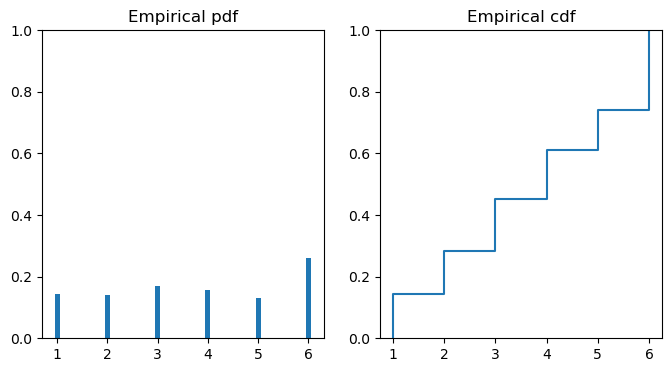

In [120]:
# Plot empirical pdf and cdf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.bar(range(1,7), counts[1:7]/n, label='True pdf', width=0.1)
ax1.set_ylim([0,1])
ax1.set_title('Empirical pdf')

ax2.ecdf(xUnFair)
ax2.set_ylim([0,1])
ax2.set_title('Empirical cdf')

plt.show()

### Example 5: The binomial distribution

In [121]:
# import scipy.stats for theoretical distributions (and much more)
import scipy.stats as stats

In [122]:
# Probability of "success"
p = 0.1

# Number of repititions
nRepeat = 30

# Simulate Bernoulli experiment 'nRepeat' times
tmp = np.random.choice([0,1], p=[1-p, p], size=nRepeat, replace=True)
print(tmp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [123]:
# Calculate number of successes
print(np.sum(tmp))

2


In [124]:
# Or: use the binomial distribution simulation function
stats.binom.rvs(n=nRepeat, p=p) # "rvs" is random variates

3

have a look at documentation for binomial distribution in scipy.stats.binom:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

- .rvs<br>
- .pmf ("pdf" but for discrete distributions)<br>
- .cdf<br>
- .ppf<br>
<br>
and more..

### Example 6: Number of 6's with fair dice

In [125]:
# 'nRepeat' independent draws from the set [1,2,3,4,5,6]
nRepeat = 30
xFair = np.random.choice([1,2,3,4,5,6], size=nRepeat, replace=True)
print(xFair)

# Count number of 6's:
print(np.sum(xFair == 6))

[6 5 4 1 4 1 6 2 1 4 4 6 3 3 2 6 6 4 3 6 5 6 4 3 2 1 6 6 5 6]
10


In [137]:
# Or: use the binomial distribution simulation function
stats.binom.rvs(n=nRepeat, p=1/6)

7

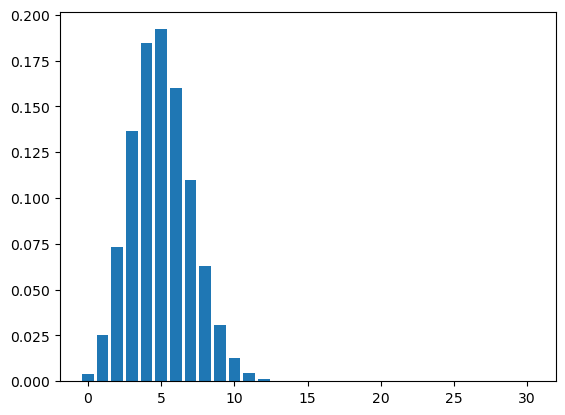

In [127]:
plt.bar(np.arange(0, nRepeat+1, 1), stats.binom.pmf(k=np.arange(0,nRepeat+1,1), n=nRepeat, p=1/6))
plt.show()

### Callcenter example

In [128]:
# we can calculate the probability using the pdf ("pmf") of the binomial:
print(stats.binom.pmf(k=6, n=6, p=0.70))

0.11764899999999996


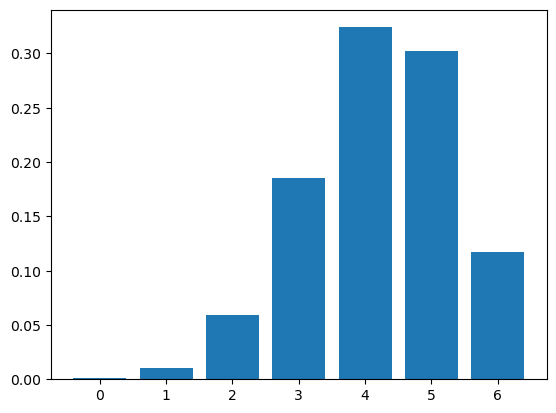

In [129]:
# lets plot entire pdf ("pmf"):
plt.bar(np.arange(0,7,1),stats.binom.pmf(k=np.arange(0,7,1), n=6, p=0.70))
plt.show()

### Harddrive example

In [138]:
# we can calculate the probability using the pdf ("pmf") of the hypergoemetrical distribution:
print(1 - stats.hypergeom.pmf(0, 10, 2, 3)) # sansynligheden for at få 0, med de forskellige parametre, 10, 2, og 3

0.5333333333333333


### Hospital admission example

In [131]:
# we can calculate the probability using the pdf ("pmf") of the poisson distribution:
print(stats.poisson.pmf(0,0.3)+stats.poisson.pmf(1,0.3)+stats.poisson.pmf(2,0.3))

0.9964005068169105


In [132]:
# or we can use the cumulative distribution function (cdf):
print(stats.poisson.cdf(2,0.3))

0.9964005068169105


### Example 7: Sample mean of n rolls with a fair dice

In [133]:
# Number of simulated realizations (sample size)
n = 30

# n independent draws from the set (1,2,3,4,5,6) 
# with equal probability of each outcome
xFair = np.random.choice(range(1, 7), size=n, replace=True)
print(xFair)

# compute the sample mean:
print(xFair.mean())

[2 1 4 3 4 3 3 1 4 1 5 3 2 2 5 5 4 6 5 1 3 1 6 4 3 6 1 4 5 2]
3.3


Now change n to 1000 and try again (do not print xFair) - what happens?

### Example 8: Sample variance of n rolls with a fair dice 

In [140]:
# Number of simulated realizations (sample size)
n = 30

# n independent draws from the set (1,2,3,4,5,6) 
# with equal probability of each outcome
xFair = np.random.choice(range(1, 7), size=n, replace=True)
print(xFair)

# compute the sample mean:
print(xFair.var(ddof=1))

[6 6 2 2 2 4 1 5 1 6 4 3 1 4 6 4 2 3 4 1 4 4 2 1 1 4 5 6 6 6]
3.4298850574712643
